## Plot

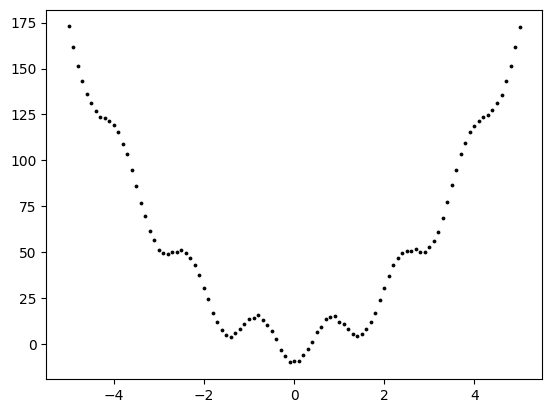

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plotdata = pd.read_csv("model5.txt", delim_whitespace=True,header=None, names=['X', 'Y'])
plt.plot(plotdata['X'], plotdata['Y'],'o', color = "#000000", label = "Original", markersize = 1.75, alpha = 0.95)
plt.show()

Iteration  1, MSE: 53.5692 a:6.7083 b:-0.0384 c:-2.8676 σa:5.48096 σb:21.09446 σc:1.29243
Difference between best parent and offspring: 9.1090744

Iteration  2, MSE: 52.3104 a:6.7809 b:-0.1250 c:-1.9445 σa:12.35309 σb:8.77885 σc:2.77371
Difference between best parent and offspring: 1.2588114

Iteration  3, MSE: 16.6212 a:6.7564 b:0.7767 c:-1.3333 σa:17.78530 σb:7.96470 σc:2.51911
Difference between best parent and offspring: 35.6891246

Iteration  4, MSE: 22.1115 a:6.8774 b:0.5570 c:18.7298 σa:3.71590 σb:1.32297 σc:14.00517
Difference between best parent and offspring: 5.4902937

Iteration  5, MSE: 36.4691 a:6.9259 b:0.3069 c:-1.2443 σa:0.86975 σb:0.63189 σc:0.65728
Difference between best parent and offspring: 14.3575398

Iteration  6, MSE: 24.1874 a:7.0543 b:2.0784 c:1.3419 σa:0.48585 σb:0.42406 σc:1.36886
Difference between best parent and offspring: 12.2816770

Iteration  7, MSE: 10.4898 a:7.1693 b:1.4585 c:21.2794 σa:0.04231 σb:0.47362 σc:3.13394
Difference between best parent and

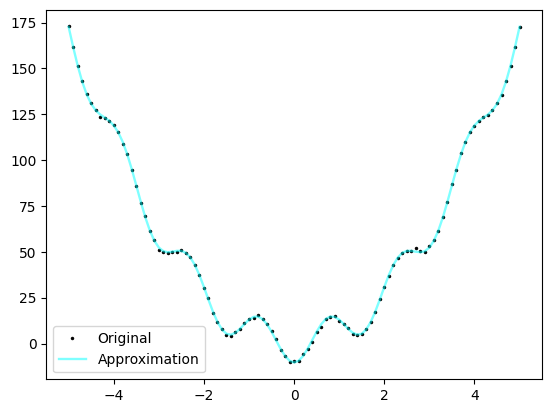

(32, 0.2577678857848631)

In [18]:
from utils import EvoStrategy
Es = EvoStrategy(150, 10**-5, 500, 5, "model5.txt", 'mi,lam')
Es.mainloop()

Iteration  1, MSE: 53.7619 a:6.8045 b:0.2327 c:1.9288 σa:8.03706 σb:2.71623 σc:9.91490
Difference between best parent and offspring: 0.8008530

Iteration  2, MSE: 52.7844 a:6.7448 b:0.0486 c:6.1558 σa:3.02118 σb:6.45980 σc:0.11153
Difference between best parent and offspring: 0.9774180

Iteration  3, MSE: 23.9134 a:6.9778 b:1.4920 c:18.7755 σa:0.70704 σb:2.44622 σc:3.37917
Difference between best parent and offspring: 28.8710148

Iteration  4, MSE: 23.9134 a:6.9778 b:1.4920 c:18.7755 σa:0.70704 σb:2.44622 σc:3.37917
Difference between best parent and offspring: 5.9946544

Iteration  5, MSE: 14.8359 a:6.7542 b:1.1405 c:-1.3552 σa:0.11011 σb:4.56753 σc:0.25191
Difference between best parent and offspring: 9.0774952

Iteration  6, MSE: 4.2691 a:6.9400 b:1.1402 c:-1.2834 σa:0.09934 σb:0.91785 σc:3.30989
Difference between best parent and offspring: 10.5667991

Iteration  7, MSE: 4.2691 a:6.9400 b:1.1402 c:-1.2834 σa:0.09934 σb:0.91785 σc:3.30989
Difference between best parent and offspring

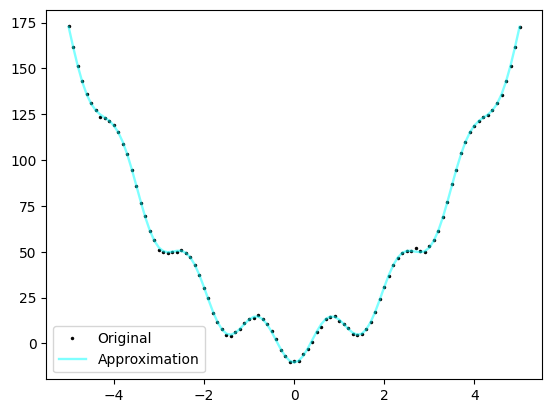

(28, 0.2577669886499821)

In [19]:
from utils import EvoStrategy
Es = EvoStrategy(150, 10**-5, 500, 5, "model5.txt", 'mi+lam')
Es.mainloop()

In [20]:
import pandas as pd

df = pd.read_csv("data.txt", sep=';')


df = df.replace("mi+lam", 1)
df = df.replace("mi,lam", 0)
df.head()

,Mode,Popsize,Offspring,MeanIter,MeanMse
0,1,50,1,101.8,0.2579
1,1,50,2,70.6,0.2578
2,1,50,5,41.0,0.2578
3,1,50,8,33.2,0.2578
4,1,200,1,76.2,0.2578


In [21]:
import plotly.express as px
fig = px.parallel_coordinates(df,
                              color="MeanIter",
                              dimensions=['Mode', 'Popsize', 'Offspring', "MeanIter", 'MeanMse'],
                              title="Evolutionary Strategy performance based on parameter changes",
                              color_continuous_scale= px.colors.sequential.Turbo
                              )
fig.show()

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['MeanIter'],
                   colorscale = px.colors.sequential.Turbo),
        dimensions = list([
            dict(tickvals = [0, 1],
                ticktext = ["µ,λ", "µ+λ"],
                label = 'Population management', values = df['Mode']),

            dict(range = [df["Popsize"].min(),df["Popsize"].max()],
                label = 'Popsize', values = df['Popsize']),

            dict(range = [df["Offspring"].min(),df["Offspring"].max()],
                label = 'Offspring', values = df['Offspring']),

            dict(range = [df["MeanIter"].min(),df["MeanIter"].max()],
                label = 'Mean Iteration', values = df['MeanIter']),

            dict(range = [df["MeanMse"].min(),df["MeanMse"].max()],
                label = 'Mean Error', values = df['MeanMse'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)
fig.write_html('plot.html')
fig.show()